In [1]:
# %matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
f = np.loadtxt('G011266.txt', dtype = 'str', delimiter = ',', skiprows = 10)

IDs = f[:,0]
proposal = f[:,4]

TCEs1 = np.loadtxt('tess2018206190142-s0001-s0001_dvr-tcestats.csv', skiprows = 7,delimiter=',', dtype = 'str')
TCEs2 = np.loadtxt('tess2018292093540-s0004-s0004_dvr-tcestats.csv', skiprows = 7,delimiter=',', dtype = 'str')
TCEs3 = np.loadtxt('tess2018267104341-s0003-s0003_dvr-tcestats.csv', skiprows = 7,delimiter=',', dtype = 'str')
TCEs4 = np.loadtxt('tess2018235142541-s0002-s0002_dvr-tcestats.csv', skiprows = 7,delimiter=',', dtype = 'str')
TCEs5 = np.loadtxt('tess2018206190142-s0001-s0003_dvr-tcestats.csv', skiprows = 7,delimiter=',', dtype = 'str')
TCEs6 = np.loadtxt('tess2018206190142-s0001-s0002_dvr-tcestats.csv', skiprows = 7,delimiter=',', dtype = 'str')

TCEs = np.concatenate((TCEs1,TCEs2,TCEs3,TCEs4,TCEs5,TCEs6))
print(TCEs.shape)
TCEs = TCEs[:500,:]
print(TCEs.shape)

TCEs_start = TCEs[:,17].tolist()

TCEs_dur = TCEs[:,16].tolist()

TCEs_period = TCEs[:,6].tolist()

for i in range(len(TCEs_dur)):
    TCEs_dur[i] = float(TCEs_dur[i])/24

for i in range(len(TCEs_start)):
    TCEs_start[i] = float(TCEs_start[i])

TCEs_end = np.add(TCEs_start, TCEs_dur)

(7565, 29)
(500, 29)


1326.18 1326.3383475 4.35721 TCE start/end, period (days)
1326.18 1326.3383475 4.35721
1325.35 1325.5092224999999 2.19919 TCE start/end, period (days)
1325.35 1325.5092224999999 2.19919
1327.22 1327.4871441666667 20.6911 TCE start/end, period (days)
1327.22 1327.4871441666667 20.6911
1331.57 1331.7317025 9.89439 TCE start/end, period (days)
1331.57 1331.7317025 9.89439
1325.34 1325.3606681249998 0.244831 TCE start/end, period (days)
1325.34 1325.3606681249998 0.244831
1329.56 1329.6951854166666 15.2437 TCE start/end, period (days)
1329.56 1329.6951854166666 15.2437
1325.34 1325.3904070833332 0.322001 TCE start/end, period (days)
1325.34 1325.3904070833332 0.322001
1325.76 1325.8361841666667 0.67025 TCE start/end, period (days)
1325.76 1325.8361841666667 0.67025
1330.22 1330.6790458333332 9.66549 TCE start/end, period (days)
1330.22 1330.6790458333332 9.66549
1328.45 1328.7085283333333 6.89586 TCE start/end, period (days)
1328.45 1328.7085283333333 6.89586


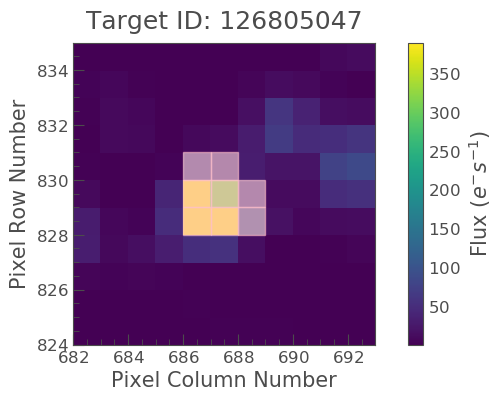

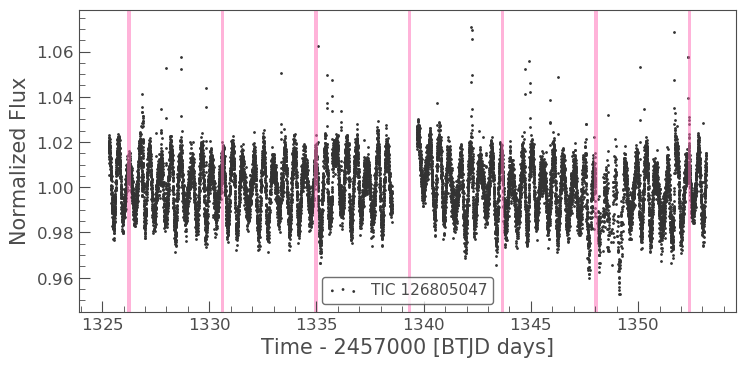

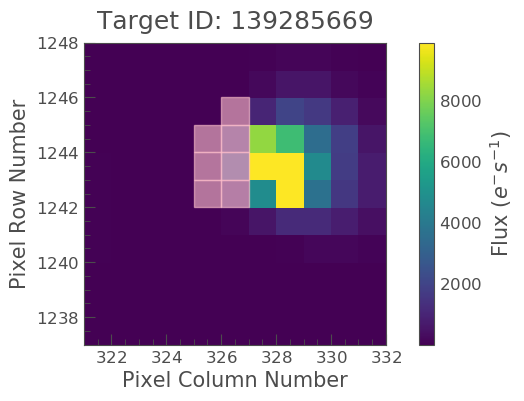

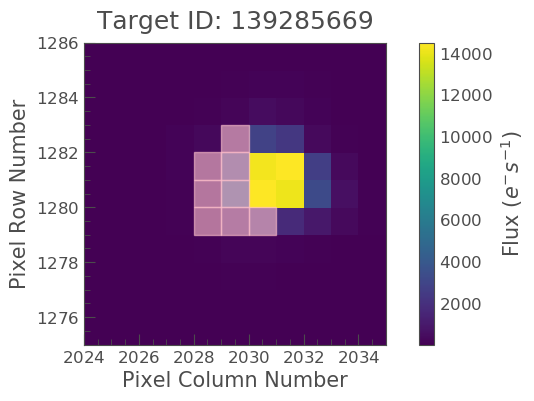

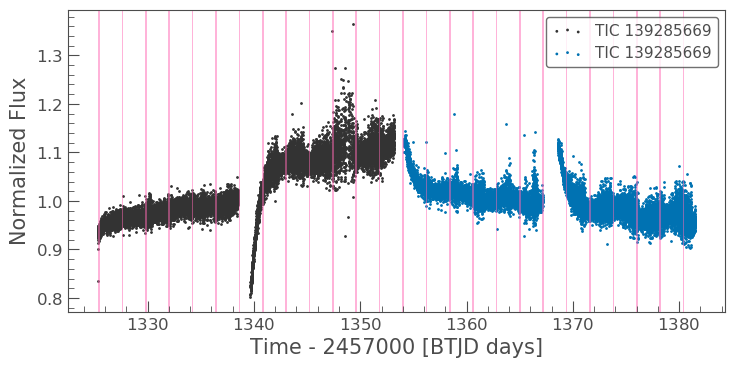

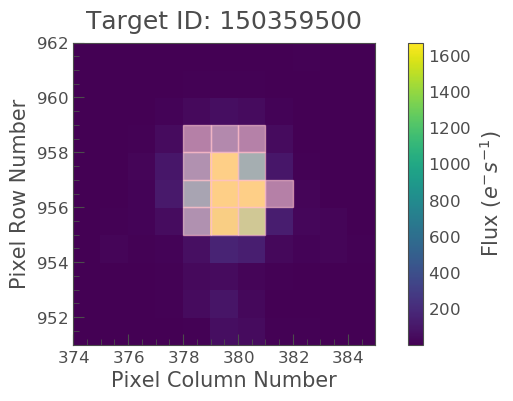

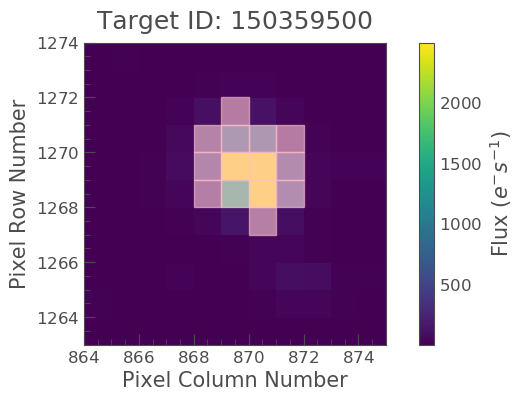

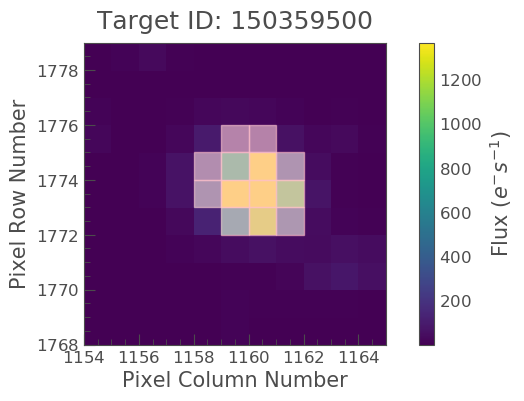

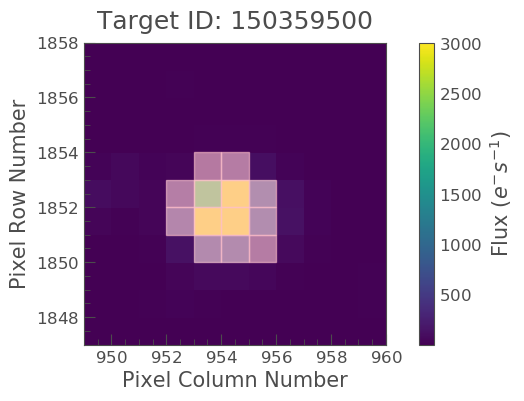

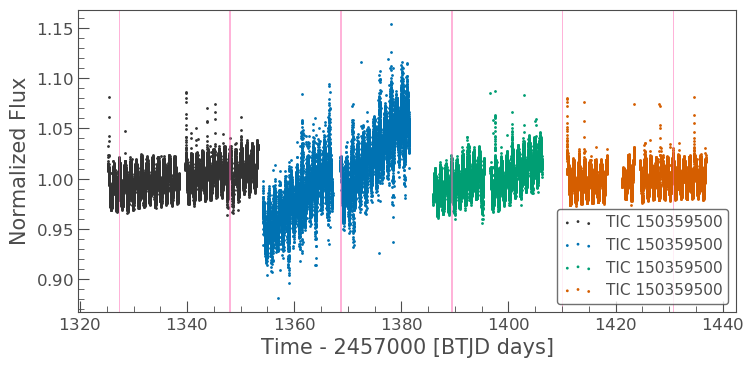

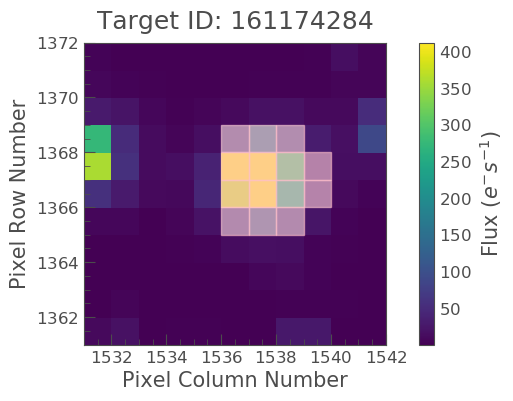

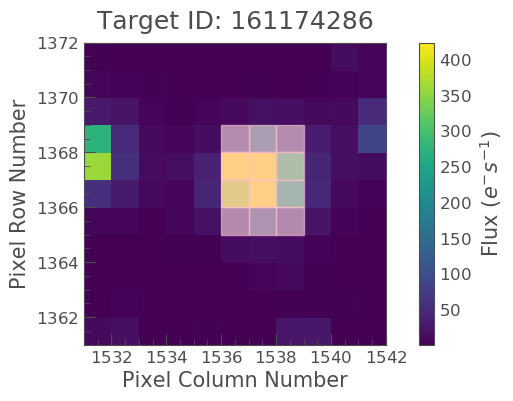

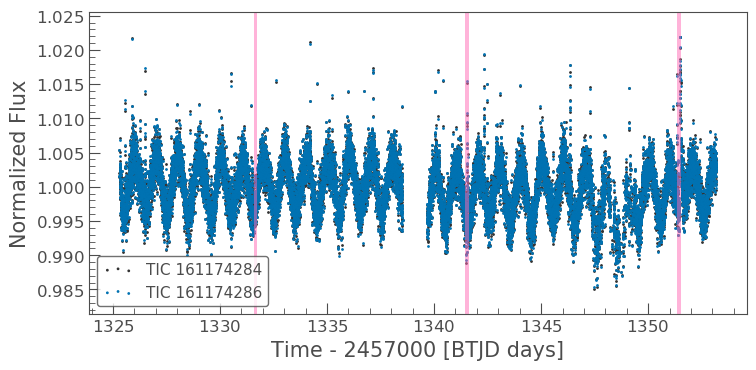

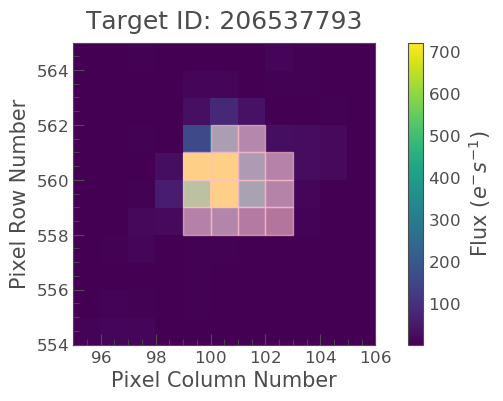

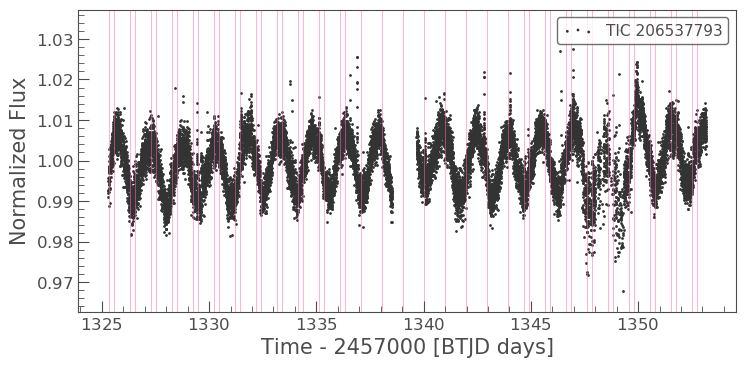

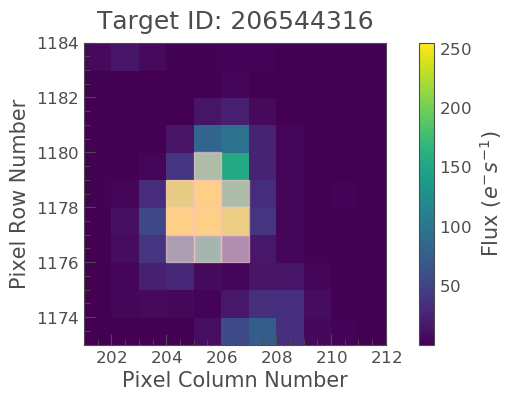

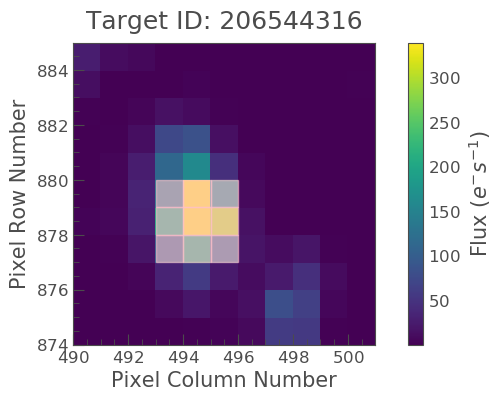

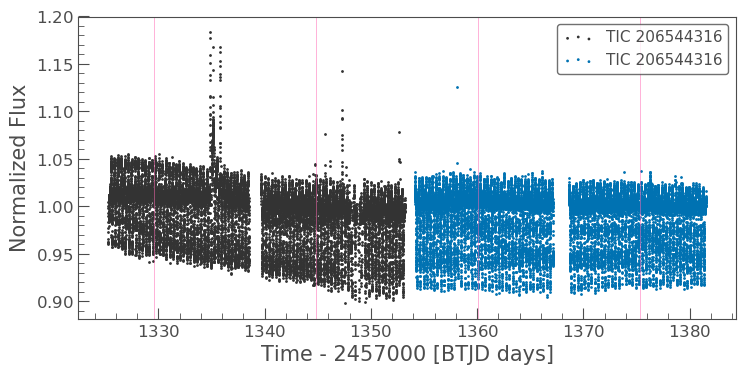

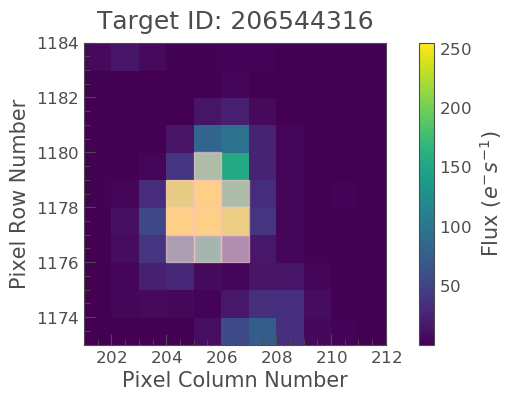

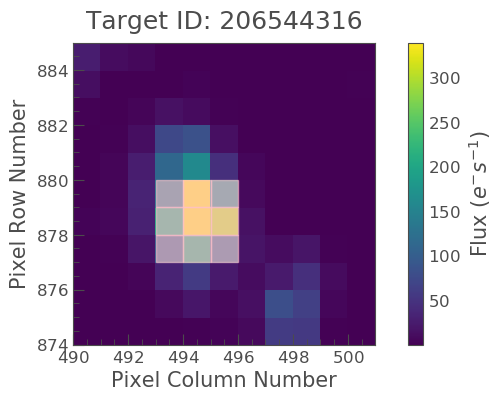

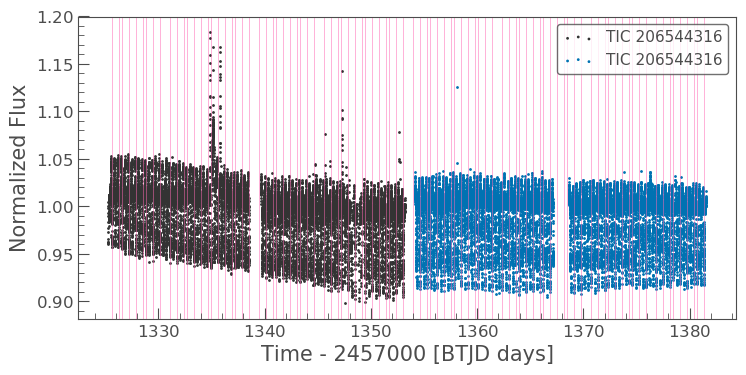

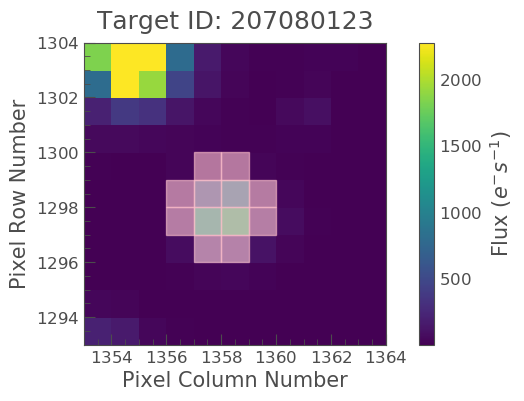

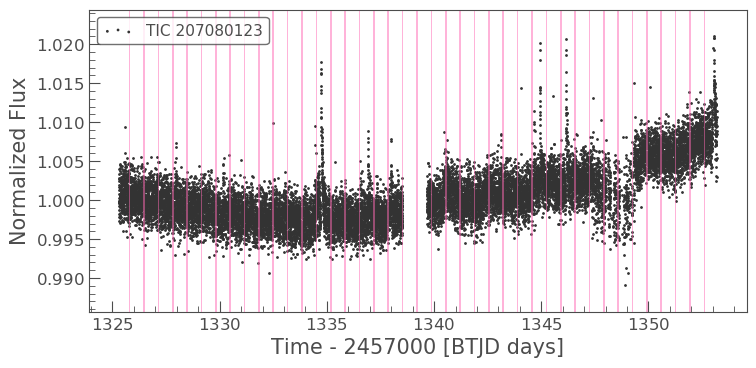

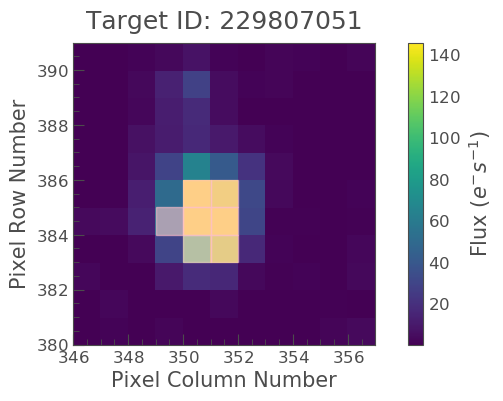

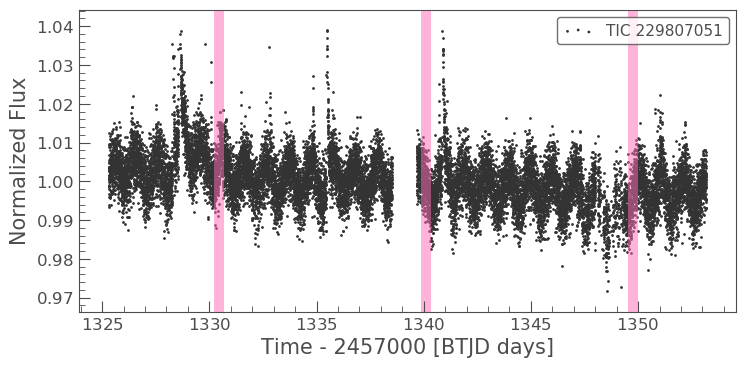

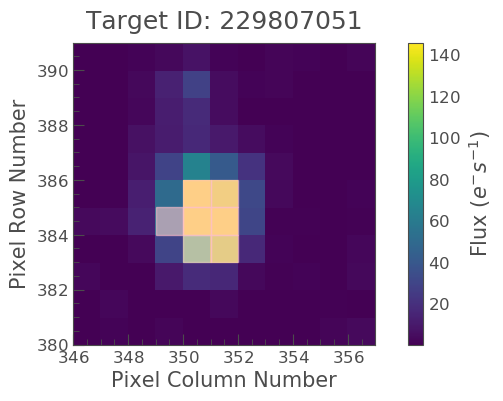

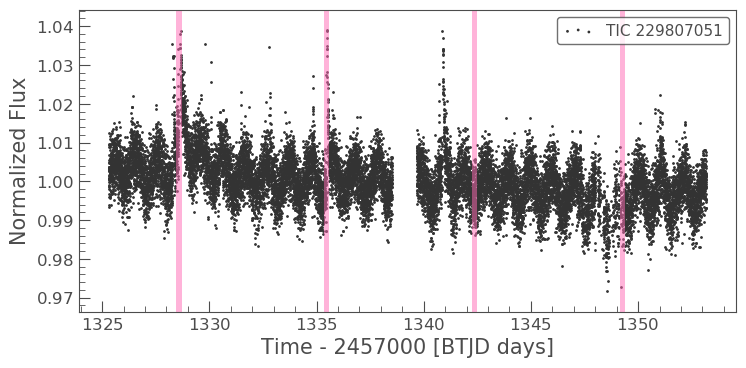

In [3]:
ID_list = []


for n, p in zip(IDs, proposal):
    if len(p)>0:
        ID_list.append(n)
        

order = np.sort(ID_list)


is_unique = []

for i in order:
    if i not in is_unique:
        is_unique.append(i)

TCE_tics= TCEs[1::,1]   

count = 0

for j in range(len(TCE_tics)):
    i = TCE_tics[j]
    if i in is_unique:
        count+=1
        
        print(TCEs_start[j], TCEs_end[j], TCEs_period[j], 'TCE start/end, period (days)')
        tpfs = lk.search_targetpixelfile('TIC {}'.format(i)).download_all()

        #plot individual apertures
        for idx, tpf in enumerate(tpfs):
            tpf.plot(aperture_mask=tpf.pipeline_mask)
        
        #pull the first sector available
        lc1 = tpfs[0].to_lightcurve(aperture_mask=tpf.pipeline_mask)
        clipped_lc1 = lc1.remove_outliers(sigma=6)
        
        #plot additional sectors
        for i in range(len(tpfs)):
            if i == 0:
                ax = clipped_lc1.scatter()
                t_max = lc1.time[-1]
            else:
                lc = tpfs[i].to_lightcurve(aperture_mask=tpf.pipeline_mask)
                clipped_lc = lc.remove_outliers(sigma=6)
                clipped_lc.scatter(ax=ax)
                t_max = lc.time[-1]
        
        #plot the TCEs given TCE duration + given period of the planet
        t1 = TCEs_start[j]
        t2 = TCEs_end[j]
        period = float(TCEs_period[j])
        print(t1, t2, period)
        
        while t1 < t_max:
            plt.axvspan(t1, t2, facecolor='hotpink', alpha=0.5)
            t1+=period
            t2+=period
